<a href="https://colab.research.google.com/github/Asif-PA/Support-Vector-Implementation/blob/main/Support_Vector_Machine_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_moons

In [ ]:
X_linear, y_linear = make_classification(n_samples=200, n_features=2,
 n_classes=2, n_redundant=0,
 n_clusters_per_class=1, random_state=42)
X_nonlinear, y_nonlinear = make_moons(n_samples=200, noise=0.2, random_state=42)

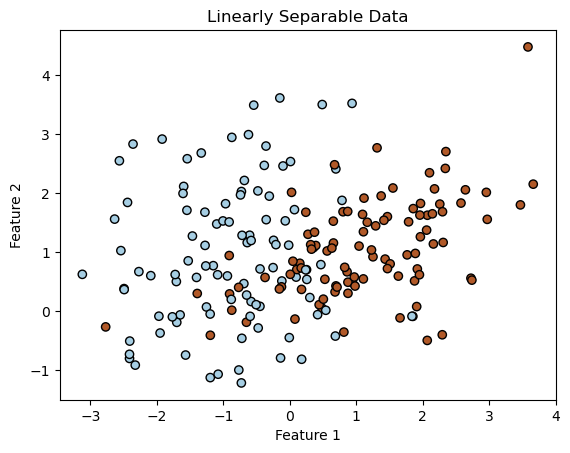

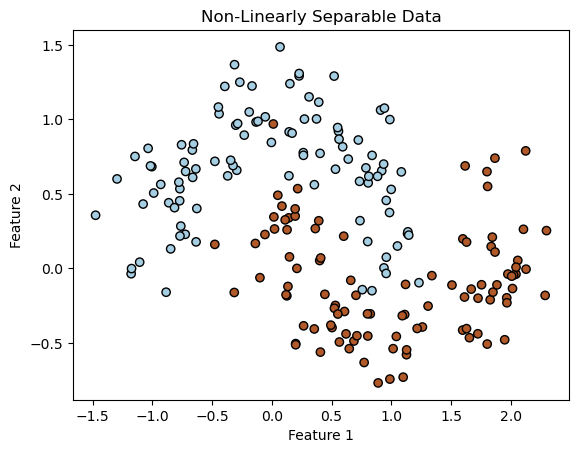

In [ ]:
def plot_data(X, y, title):
 plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
 plt.title(title)
 plt.xlabel("Feature 1")
 plt.ylabel("Feature 2")
 plt.show()

# Plot both datasets
plot_data(X_linear, y_linear, "Linearly Separable Data")
plot_data(X_nonlinear, y_nonlinear, "Non-Linearly Separable Data")

In [ ]:
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_linear, y_linear)

SVC(kernel='linear')

In [ ]:
svm_nonlinear = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_nonlinear.fit(X_nonlinear, y_nonlinear)

SVC()

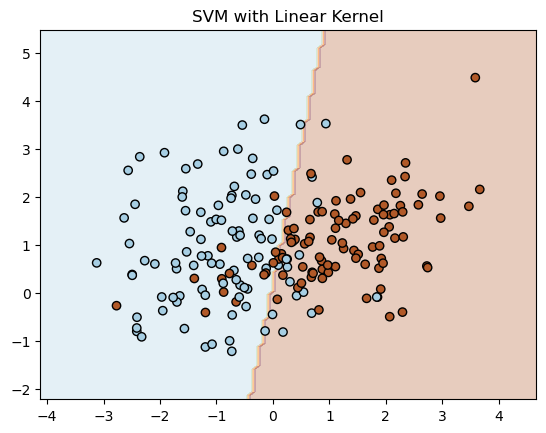

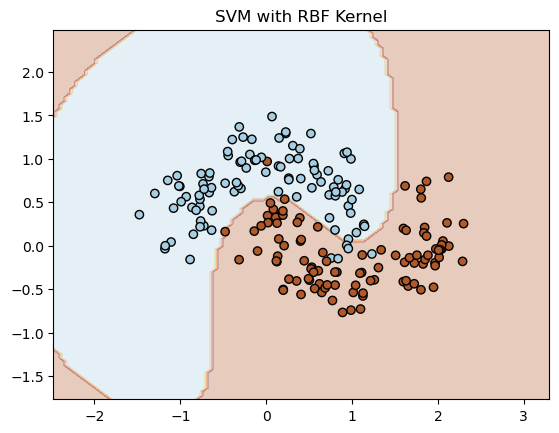

In [ ]:
def plot_decision_boundary(X, y, model, title):
 x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
 np.linspace(y_min, y_max, 100))

 Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
 Z = Z.reshape(xx.shape)

 plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
 plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
 plt.title(title)
 plt.show()

# Plot decision boundaries
plot_decision_boundary(X_linear, y_linear, svm_linear, "SVM with Linear Kernel")
plot_decision_boundary(X_nonlinear, y_nonlinear, svm_nonlinear, "SVM with RBF Kernel")


Comparison of Soft margin against hard margin on linear data

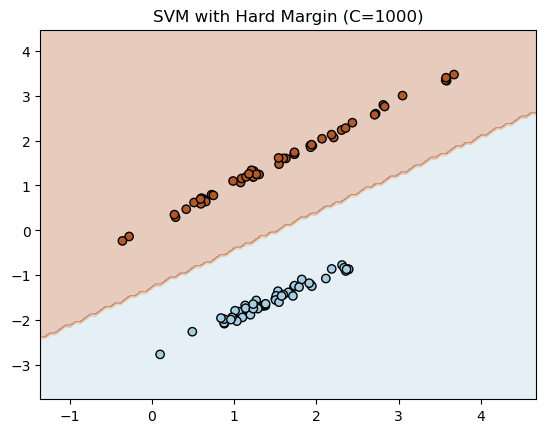

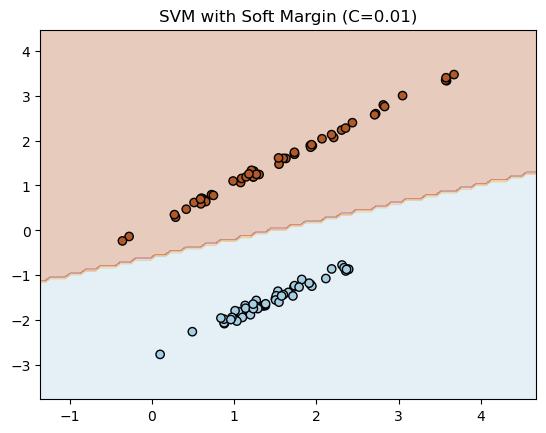

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Generate a dataset (almost linearly separable but with some noise)
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
 n_clusters_per_class=1, class_sep=1.5, random_state=42)

# SVM with Hard Margin (C=1000, very strict)
svm_hard = SVC(kernel='linear', C=1000)
svm_hard.fit(X, y)

# SVM with Soft Margin (C=0.01, more flexible)
svm_soft = SVC(kernel='linear', C=0.01)
svm_soft.fit(X, y)

def plot_decision_boundary(X, y, model, title):
 x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
 np.linspace(y_min, y_max, 100))

 Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
 Z = Z.reshape(xx.shape)

 plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
 plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
 plt.title(title)
 plt.show()

# Plot decision boundaries for both models
plot_decision_boundary(X, y, svm_hard, "SVM with Hard Margin (C=1000)")
plot_decision_boundary(X, y, svm_soft, "SVM with Soft Margin (C=0.01)")